## VAISHNAVI JAMBE__TSF Data Science Intern

   # Task 6 - Decision Tree

# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#for encoding
from sklearn.preprocessing import LabelEncoder
#for train test splitting
from sklearn.model_selection import train_test_split
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree

# Reading Dataset

In [3]:
#reading the data
df=pd.read_csv(r"C:\Users\VAISHNAVI\Downloads\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Summarising Dataset

In [4]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Check the null values
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
df.shape

(150, 6)

# EDA

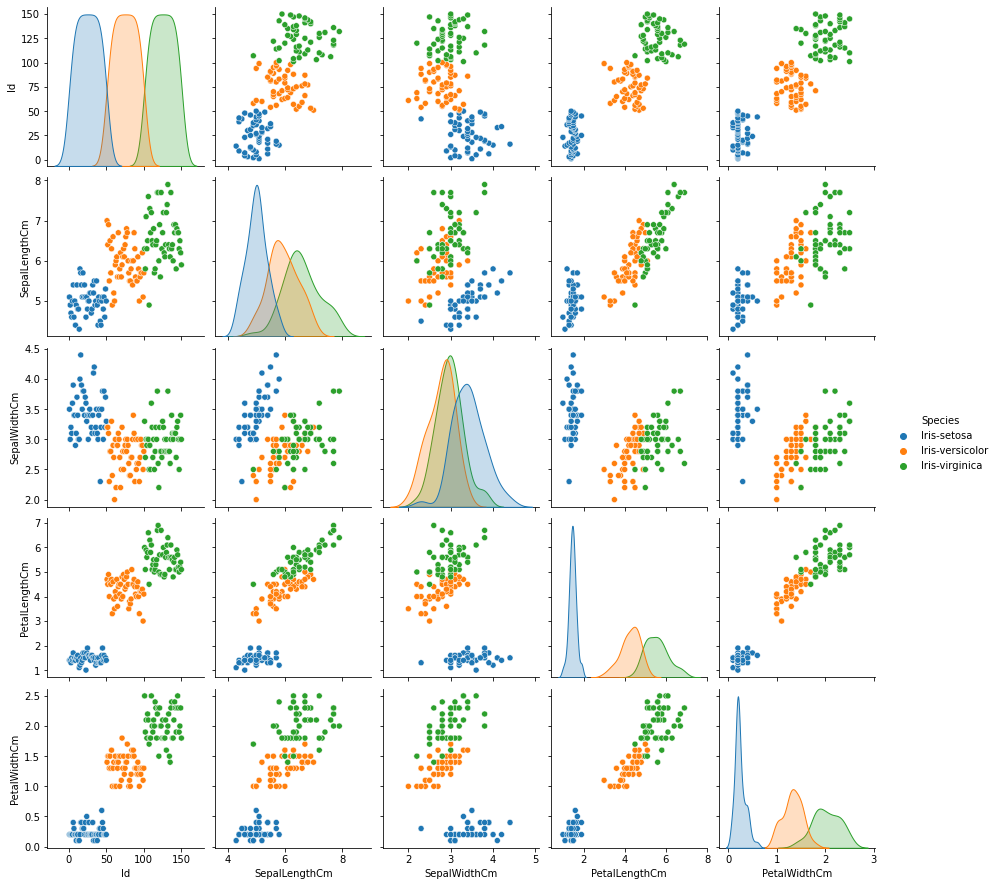

In [7]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Species')


<AxesSubplot:>

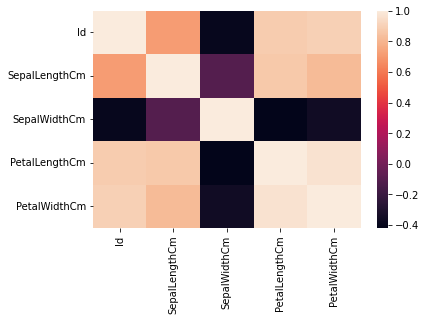

In [8]:
# correlation matrix
sns.heatmap(df.corr())

# DECISION TREE ALGORITHM

In [9]:
target = df['Species']
#creating a copy to avoid deleting the column from original data set
df1 = df.copy()
#dropping target variable
df1 = df1.drop('Species', axis =1)
df1.shape


(150, 5)

In [10]:
# Defining the attributes
X = df1

In [11]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)#to convert categorical variables to numerical variable
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
y = target

In [14]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 5)
Testing split input-  (30, 5)


In [15]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')



Decision Tree Classifer Created


In [16]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
cm =confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0.5, 15.0, 'Predicted label')

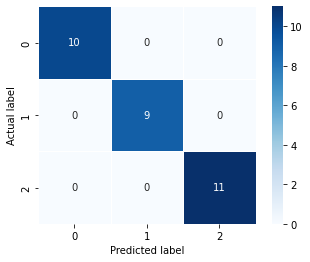

In [18]:
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 1.0')

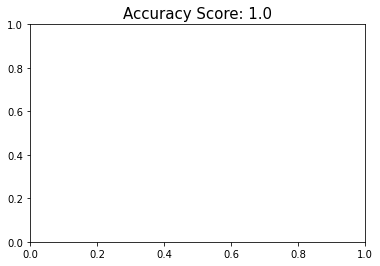

In [19]:
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

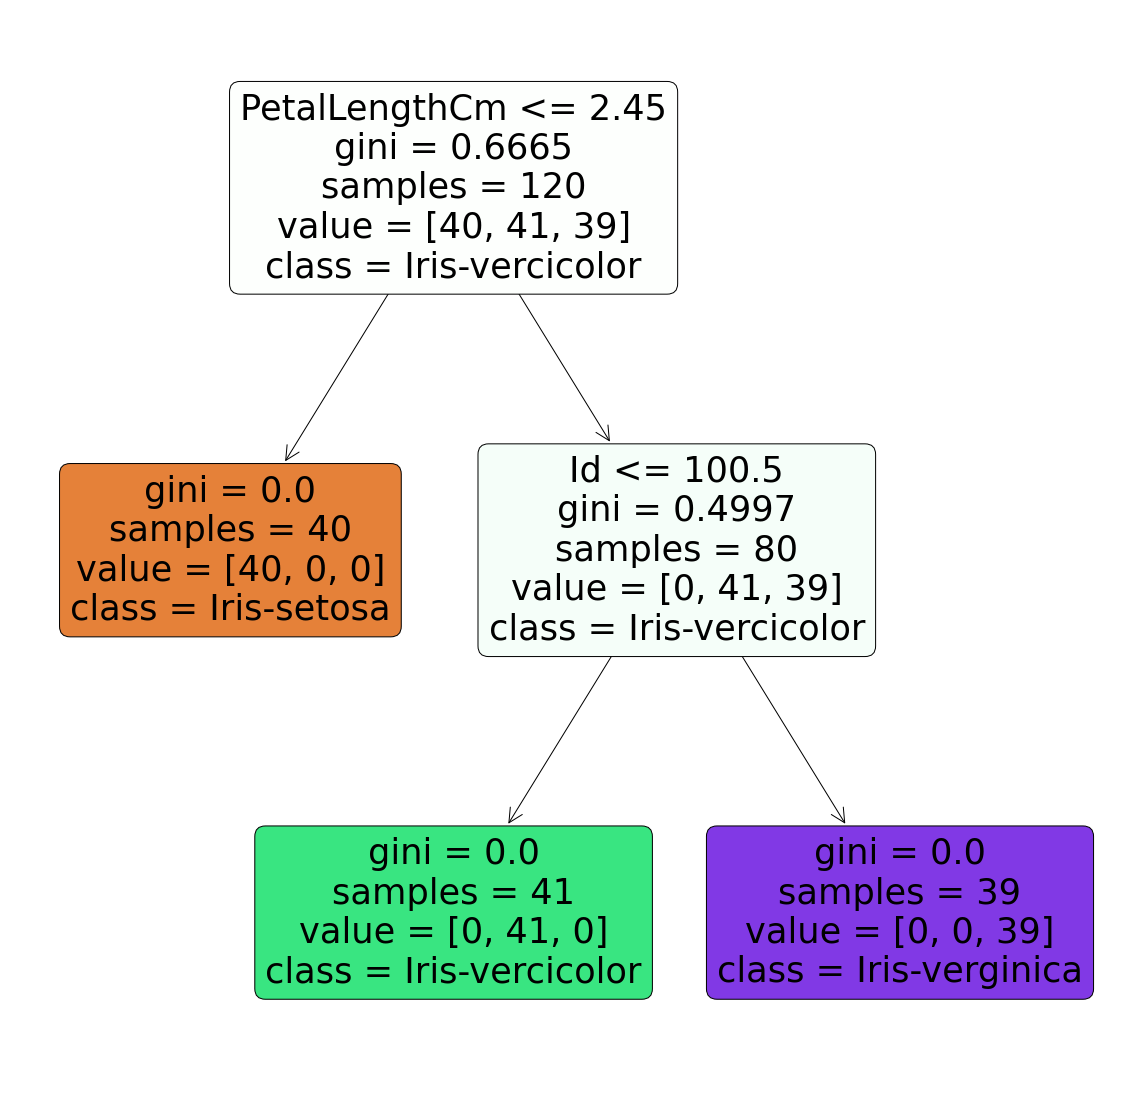

In [21]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Iris-setosa", "Iris-vercicolor", "Iris-verginica"] , filled = True , precision = 4, rounded = True)
